### Task 4 : Data exxploratory Analysis - Terrorism

- To Perform 'Exploratory Data Analysis' on dataset "Global Terrorism".
- As a security/defence analyst, try to figure out the Hot-Zone of Terrorism.
- What all issues and insights you can dervive by EDA ?


### Author: Pooja Rao

In [2]:
# importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import seaborn as sns


In [3]:
df = pd.read_csv(r'c:\Users\raopo\Downloads\globalterrorismdb.csv', encoding='ISO-8859-1')
df.head()

C:\Users\raopo\AppData\Local\Temp\ipykernel_7724\2938813619.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'c:\Users\raopo\Downloads\globalterrorismdb.csv', encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df.shape

(181691, 135)

In [6]:
# renaming column names

df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df['Casualities'] = df.Killed + df.Wounded

# df with necessary columns 

df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group',
       'Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [7]:
#checking for missing values

df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             435
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           638
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [8]:
# drop missing values

df.dropna(axis=0, inplace=True)
df.shape

(159944, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159944 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         159944 non-null  int64  
 1   Month        159944 non-null  int64  
 2   Day          159944 non-null  int64  
 3   Country      159944 non-null  object 
 4   Region       159944 non-null  object 
 5   City         159944 non-null  object 
 6   latitude     159944 non-null  float64
 7   longitude    159944 non-null  float64
 8   AttackType   159944 non-null  object 
 9   Killed       159944 non-null  float64
 10  Wounded      159944 non-null  float64
 11  Casualities  159944 non-null  float64
 12  Target       159944 non-null  object 
 13  Group        159944 non-null  object 
 14  Target_type  159944 non-null  object 
 15  Weapon_type  159944 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 20.7+ MB


In [10]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,159944.000000,159944.000000,159944.000000,159944.000000,1.599440e+05,159944.000000,159944.000000,159944.000000
mean,2003.477761,6.487771,15.527503,23.702419,-5.087948e+02,2.093608,3.196775,5.290383
std,12.716774,3.387189,8.802178,18.302368,2.155025e+05,9.761575,36.510467,42.610286
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.644191e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.558212,4.378420e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.914701e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


### Data Visualization:

#### Q1. Where are the hotspots of terrorism?

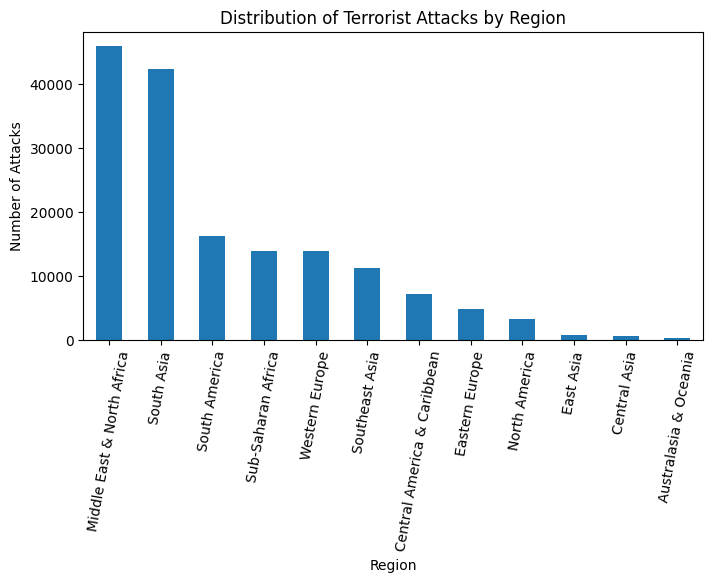

In [19]:
# Bar chart for region distribution

region_distribution = df['Region'].value_counts()

plt.figure(figsize=(8,4))
region_distribution.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Terrorist Attacks by Region')
plt.xticks(rotation=80)
plt.show()

In Middle East and North America region, the number of attacks are highest.

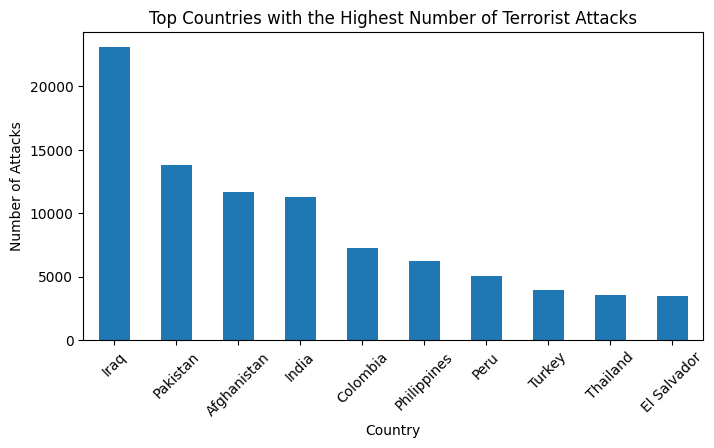

In [22]:
# Bar chart for top countries

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top Countries with the Highest Number of Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()

The highest number of attacks are in Iraq.

#### Q2. How have terrorist incidents evolved over time?

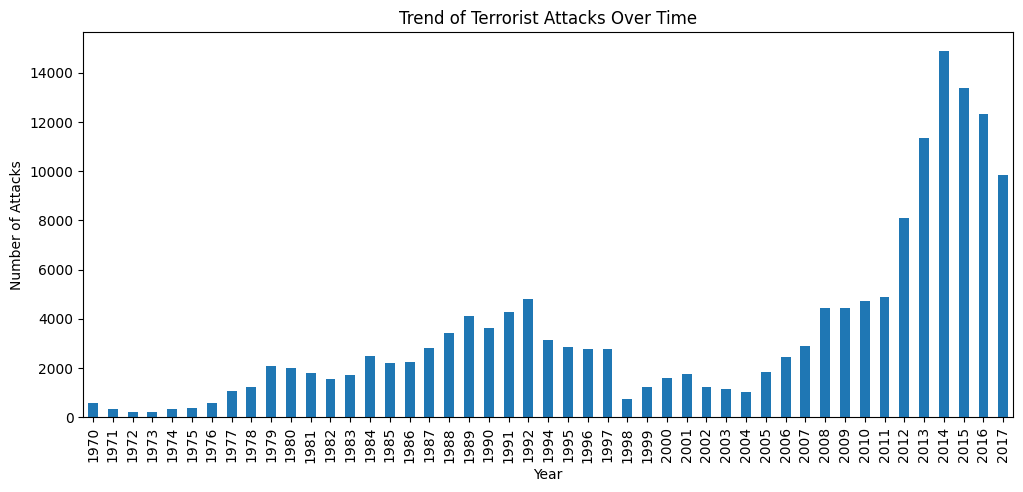

In [37]:
# Time series plot for yearly attacks

yearly_incidents = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
yearly_incidents.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of Terrorist Attacks Over Time')
plt.show()

#### Q3. What are the most common attack types and their impact?

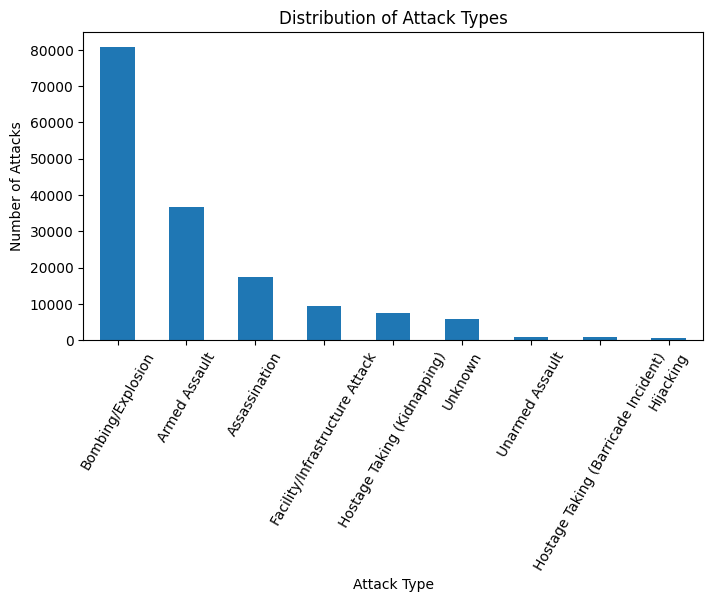

In [29]:
# Bar chart for attack types

attack_types = df['AttackType'].value_counts()

plt.figure(figsize=(8, 4))
attack_types.plot(kind='bar')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attack Types')
plt.xticks(rotation=60)
plt.show()

#### Q4. Who are the major perpetrators of terrorism?

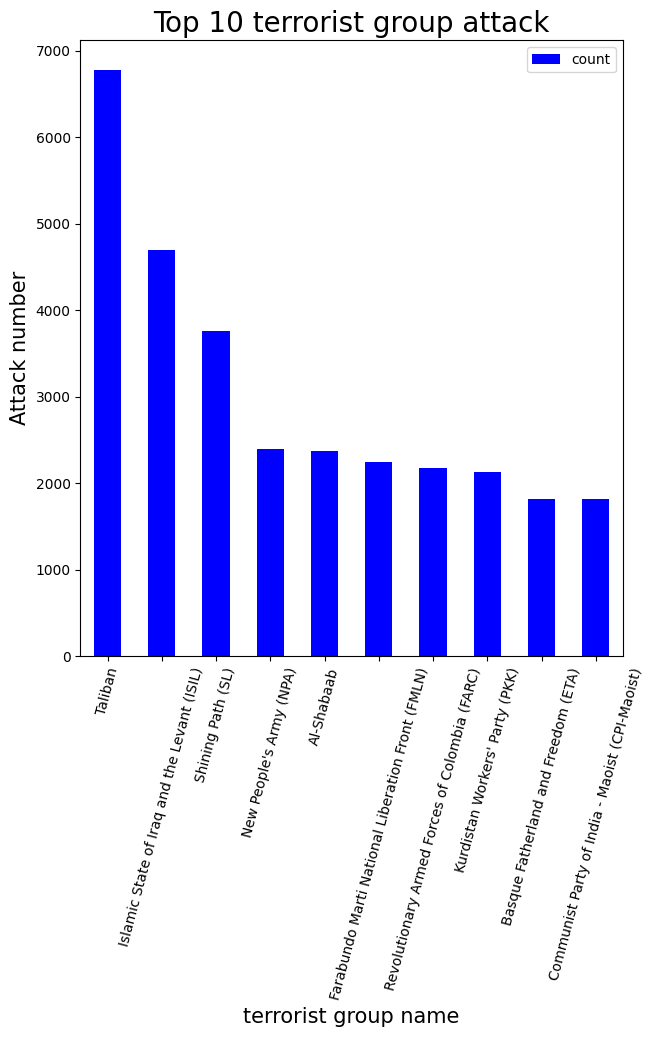

In [41]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='blue',figsize=(7,8))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(rotation = 75)
plt.show()

#### Q5.Total Number of people killed in terror attack

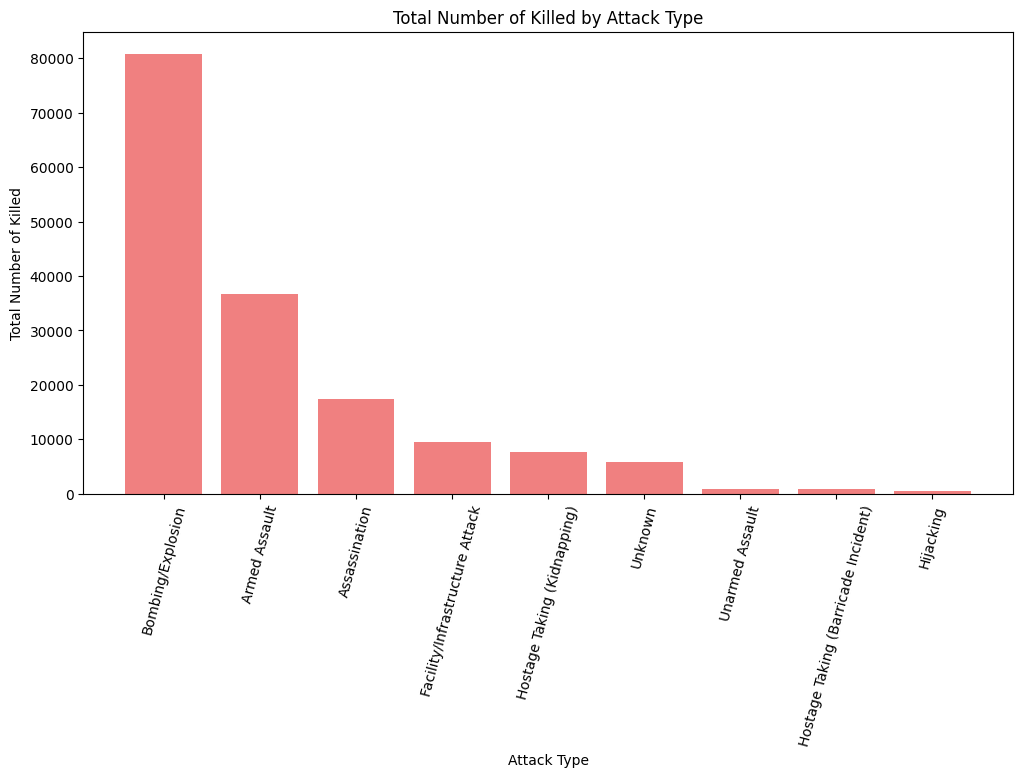

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(attack_types.index, attack_types.values, color='lightcoral')
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Killed')
plt.title('Total Number of Killed by Attack Type')
plt.xticks(rotation=75)
plt.show()